#               Signal Frequency Filtering

Frequency filters are crucial tools used for manipulating or analyzing signals by allowing certain frequency components to pass through while attenuating others. These filters are essential in various applications. The design and implementation of frequency filters are guided by the specific requirements of the application, such as the desired cut-off frequencies, the steepness of the transition band, and the permissible levels of ripple in the passband and stopband. The main types of frequency filters are:

**Low-Pass Filters:** These filters allow signals with a frequency lower than a certain cutoff frequency to pass through while attenuating signals with frequencies higher than the cutoff. Low-pass filters are widely used in signal smoothing and in eliminating high-frequency noise.

**High-Pass Filters:** High-pass filters perform the opposite function of low-pass filters. They allow signals with frequencies higher than a certain cutoff frequency to pass and attenuate signals with lower frequencies. HPFs are commonly used in applications requiring the removal of low-frequency noise or drift from a signal.

**Band-Pass Filters**: Band-pass filters allow signals within a specific frequency range (band) to pass through while attenuating frequencies outside this range. These filters are used in applications where a particular frequency band is of interest, such as in certain types of signal analysis and telecommunications.

**Band-Stop Filters or Notch Filters:** Band-stop filters, also known as notch filters or band-reject filters, attenuate signals within a specific frequency range while allowing frequencies outside this range to pass through. These filters are useful in rejecting interference or noise at specific frequencies without affecting the rest of the signal spectrum.

### This code facilitates the implementation of various types of frequency filters using Butterworth digital filters using  *scipy.signal*  *butter* and *filtfilt* functions.

Butterworth filters, characterized by their maximally flat frequency response in the passband, are widely utilized due to their smooth transition from passband to stopband with no ripple.

In [1]:
from scipy.signal import butter, filtfilt

import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
from scipy import signal
from scipy.signal import welch
from scipy.fft import fft, fftfreq
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load vibration signal:
random_vib_signal = loadtxt('vib.csv', delimiter=',') 
num_samples_vib = len(random_vib_signal) # number of datapoints in the signal.
fs = 64000 # sampling rate
time = np.arange(0.0, num_samples_vib, 1.0)/fs # time vector.

In [3]:
# Function to compute FFT:
def apply_fft(x, fs):
    N = len(x) # number of samples in the signal.
    T = 1.0 / fs
    fft_coef = fft(x-np.mean(x)) # Obtain FFT coefficients after removing the mean (DC component) from the signal.
    xf = fftfreq(N, T)[:N//2] # Taking positive spectrum only.
    fft_positve = 2.0/N * np.abs(fft_coef[0:N//2]) # Multiply  abs(FFT coefficients) by 2 to compensate for positive spectrum and normalize by signal length.
    return xf, fft_positve

In [4]:
# Function to compute PSD
def compute_psd(signal, length, fs):
    seg_length =  length/10 # Segment length.
    overlap = seg_length/20 # overlap between segements (in number of samples)
    nfft_length = 2**14 # FFT length
    frequencies, psd = welch(signal,  fs = fs, window='han', nperseg= seg_length, noverlap= overlap, nfft= nfft_length)
    
    return frequencies, psd

In [5]:
# PSD of raw signal
f_psd, psd = compute_psd(random_vib_signal, len(random_vib_signal),  fs)

## FFT of raw signal
f_fft, fft_ = apply_fft(random_vib_signal, fs)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Design of  a low-pass filter with cut-off frequency of 5000 Hz:

In [6]:
N = 4  # Filter order. Generally, a higher order will have a steeper roll-off

filter_type = 'low'
b, a = butter(N, 5000,fs =fs,  btype= filter_type, analog=False) # a & b are filter coefficients

In [7]:
# Filtering:

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, random_vib_signal)

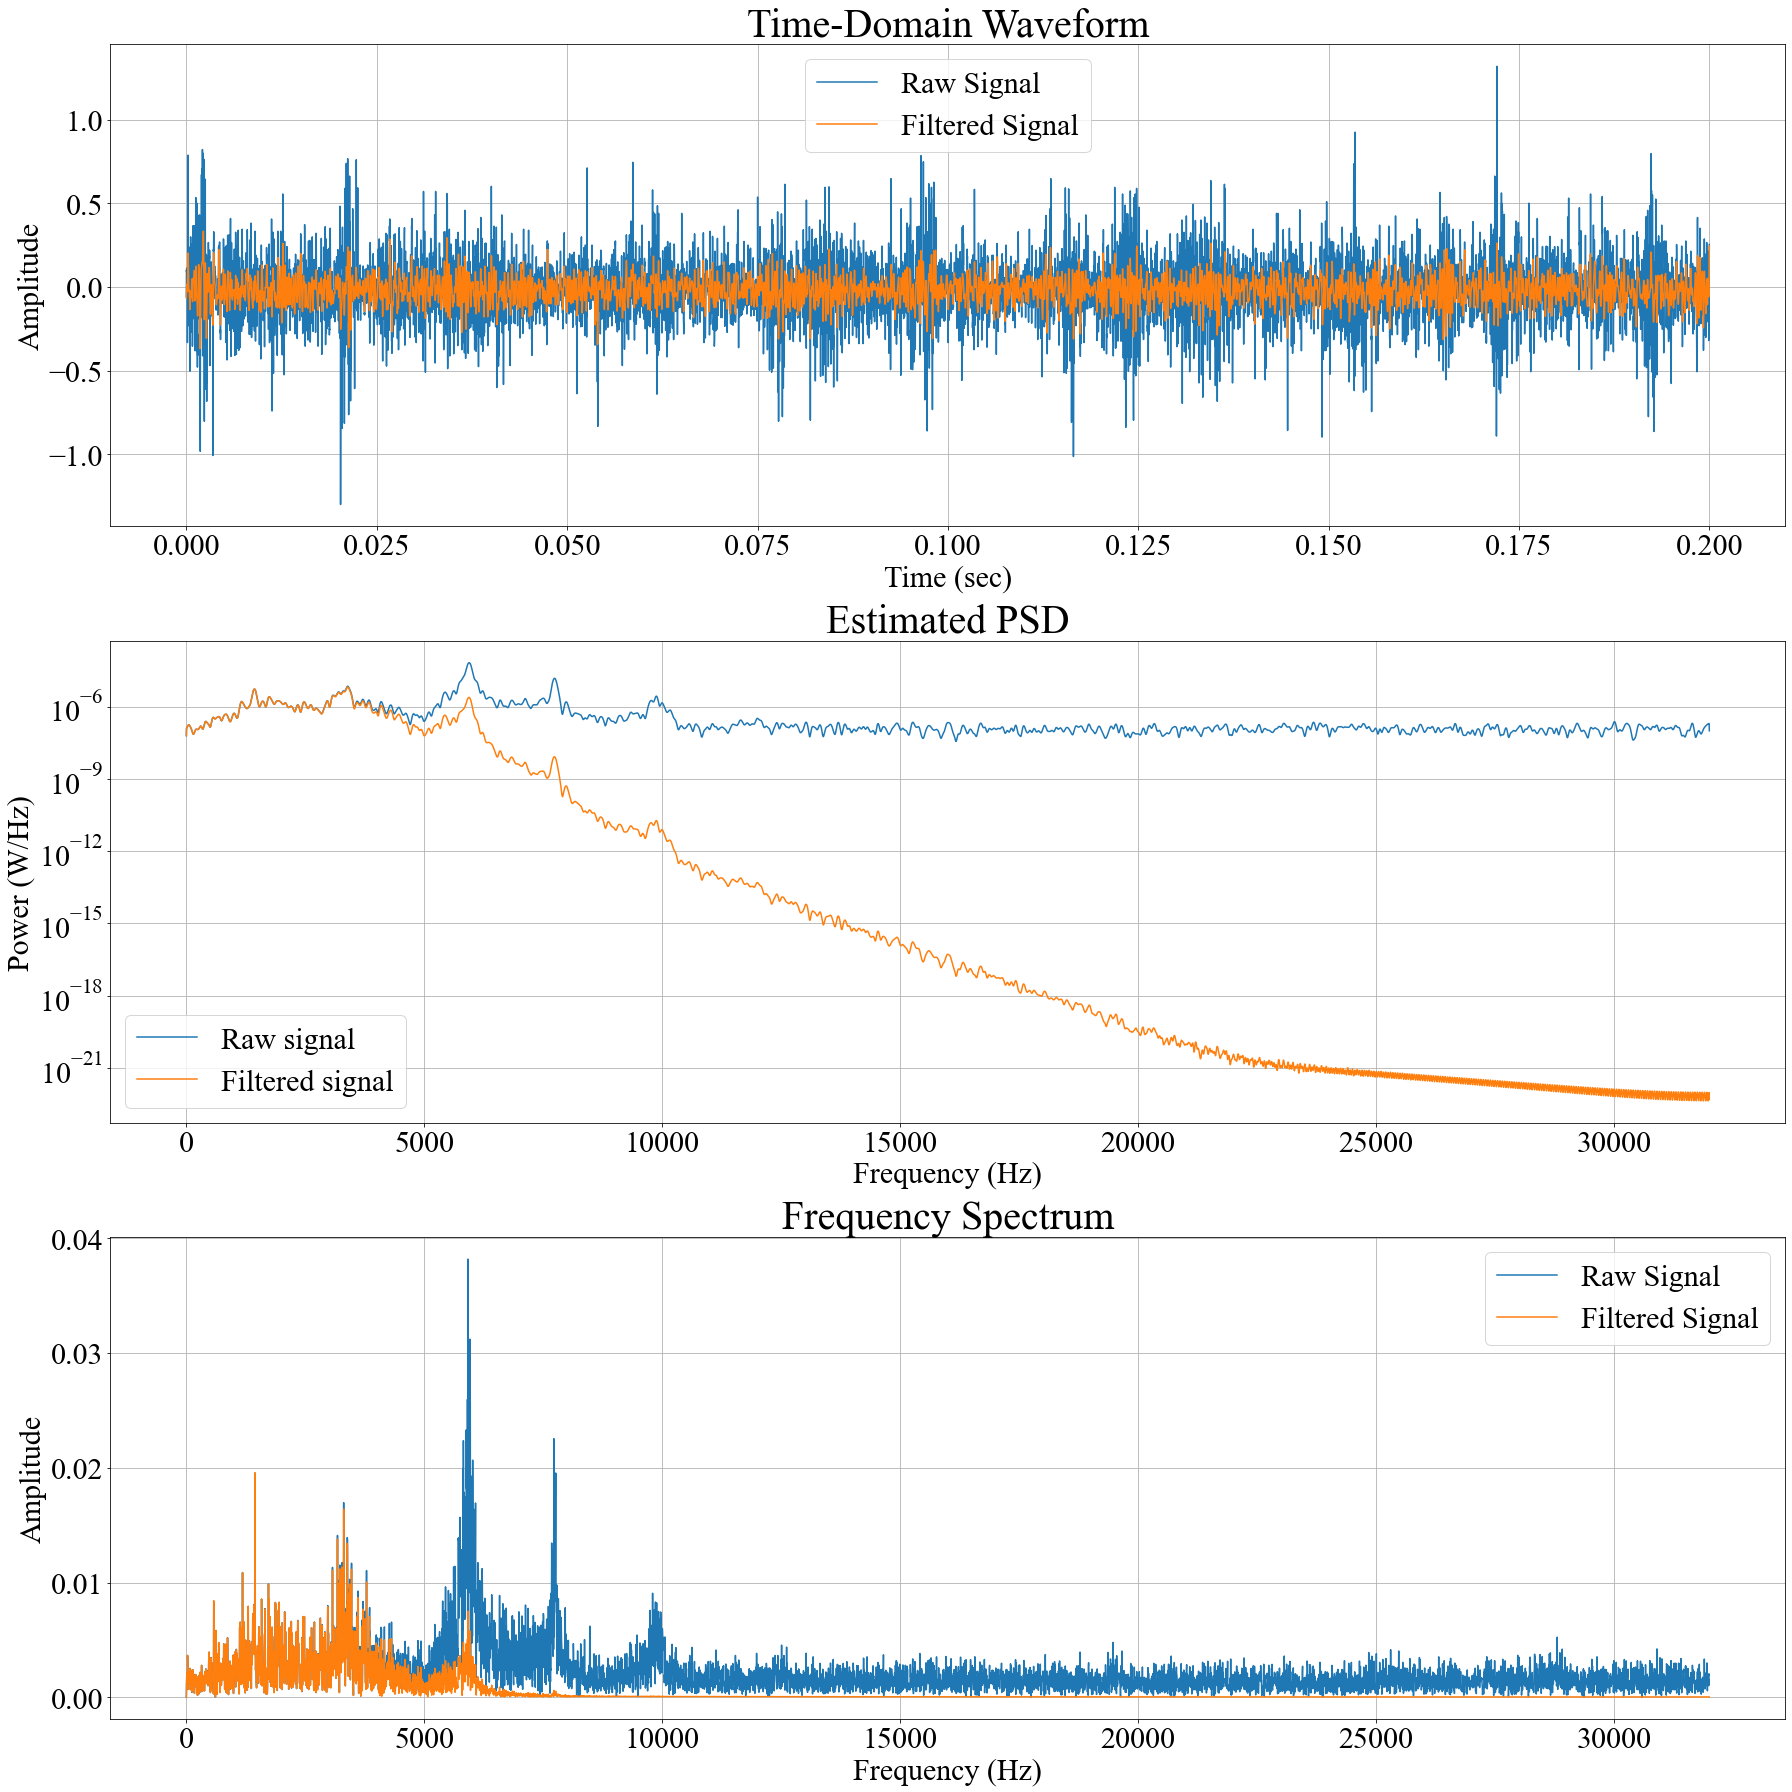

In [8]:
# A comparison between unfiltered (raw) and filtered EEG signals.

f_psd2, psd2 = compute_psd(filtered_signal,len(filtered_signal),  fs)
f_fft2, fft2 = apply_fft(filtered_signal, fs)

plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.plot(time, random_vib_signal, label='Raw Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (sec)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Time-Domain Waveform', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.semilogy(f_psd, psd, label = 'Raw signal')
plt.semilogy(f_psd2, psd2, label = 'Filtered signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Power (W/Hz)', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)
plt.title('Estimated PSD', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f_fft, fft_, label='Raw Signal')
plt.plot(f_fft2, fft2, label='Filtered Signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Frequency Spectrum', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.tight_layout()
plt.show()

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Design of  a high-pass filter with pass frequency of 5000 Hz:

In [9]:
N = 4  # Filter order. Generally, a higher order will have a steeper roll-off

filter_type = 'high'
# Butterworth high-pass filter design
b, a = butter(N, 5000,fs =fs,  btype= filter_type, analog=False) # a & b are filter coefficients

In [10]:
# Filtering:

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, random_vib_signal)

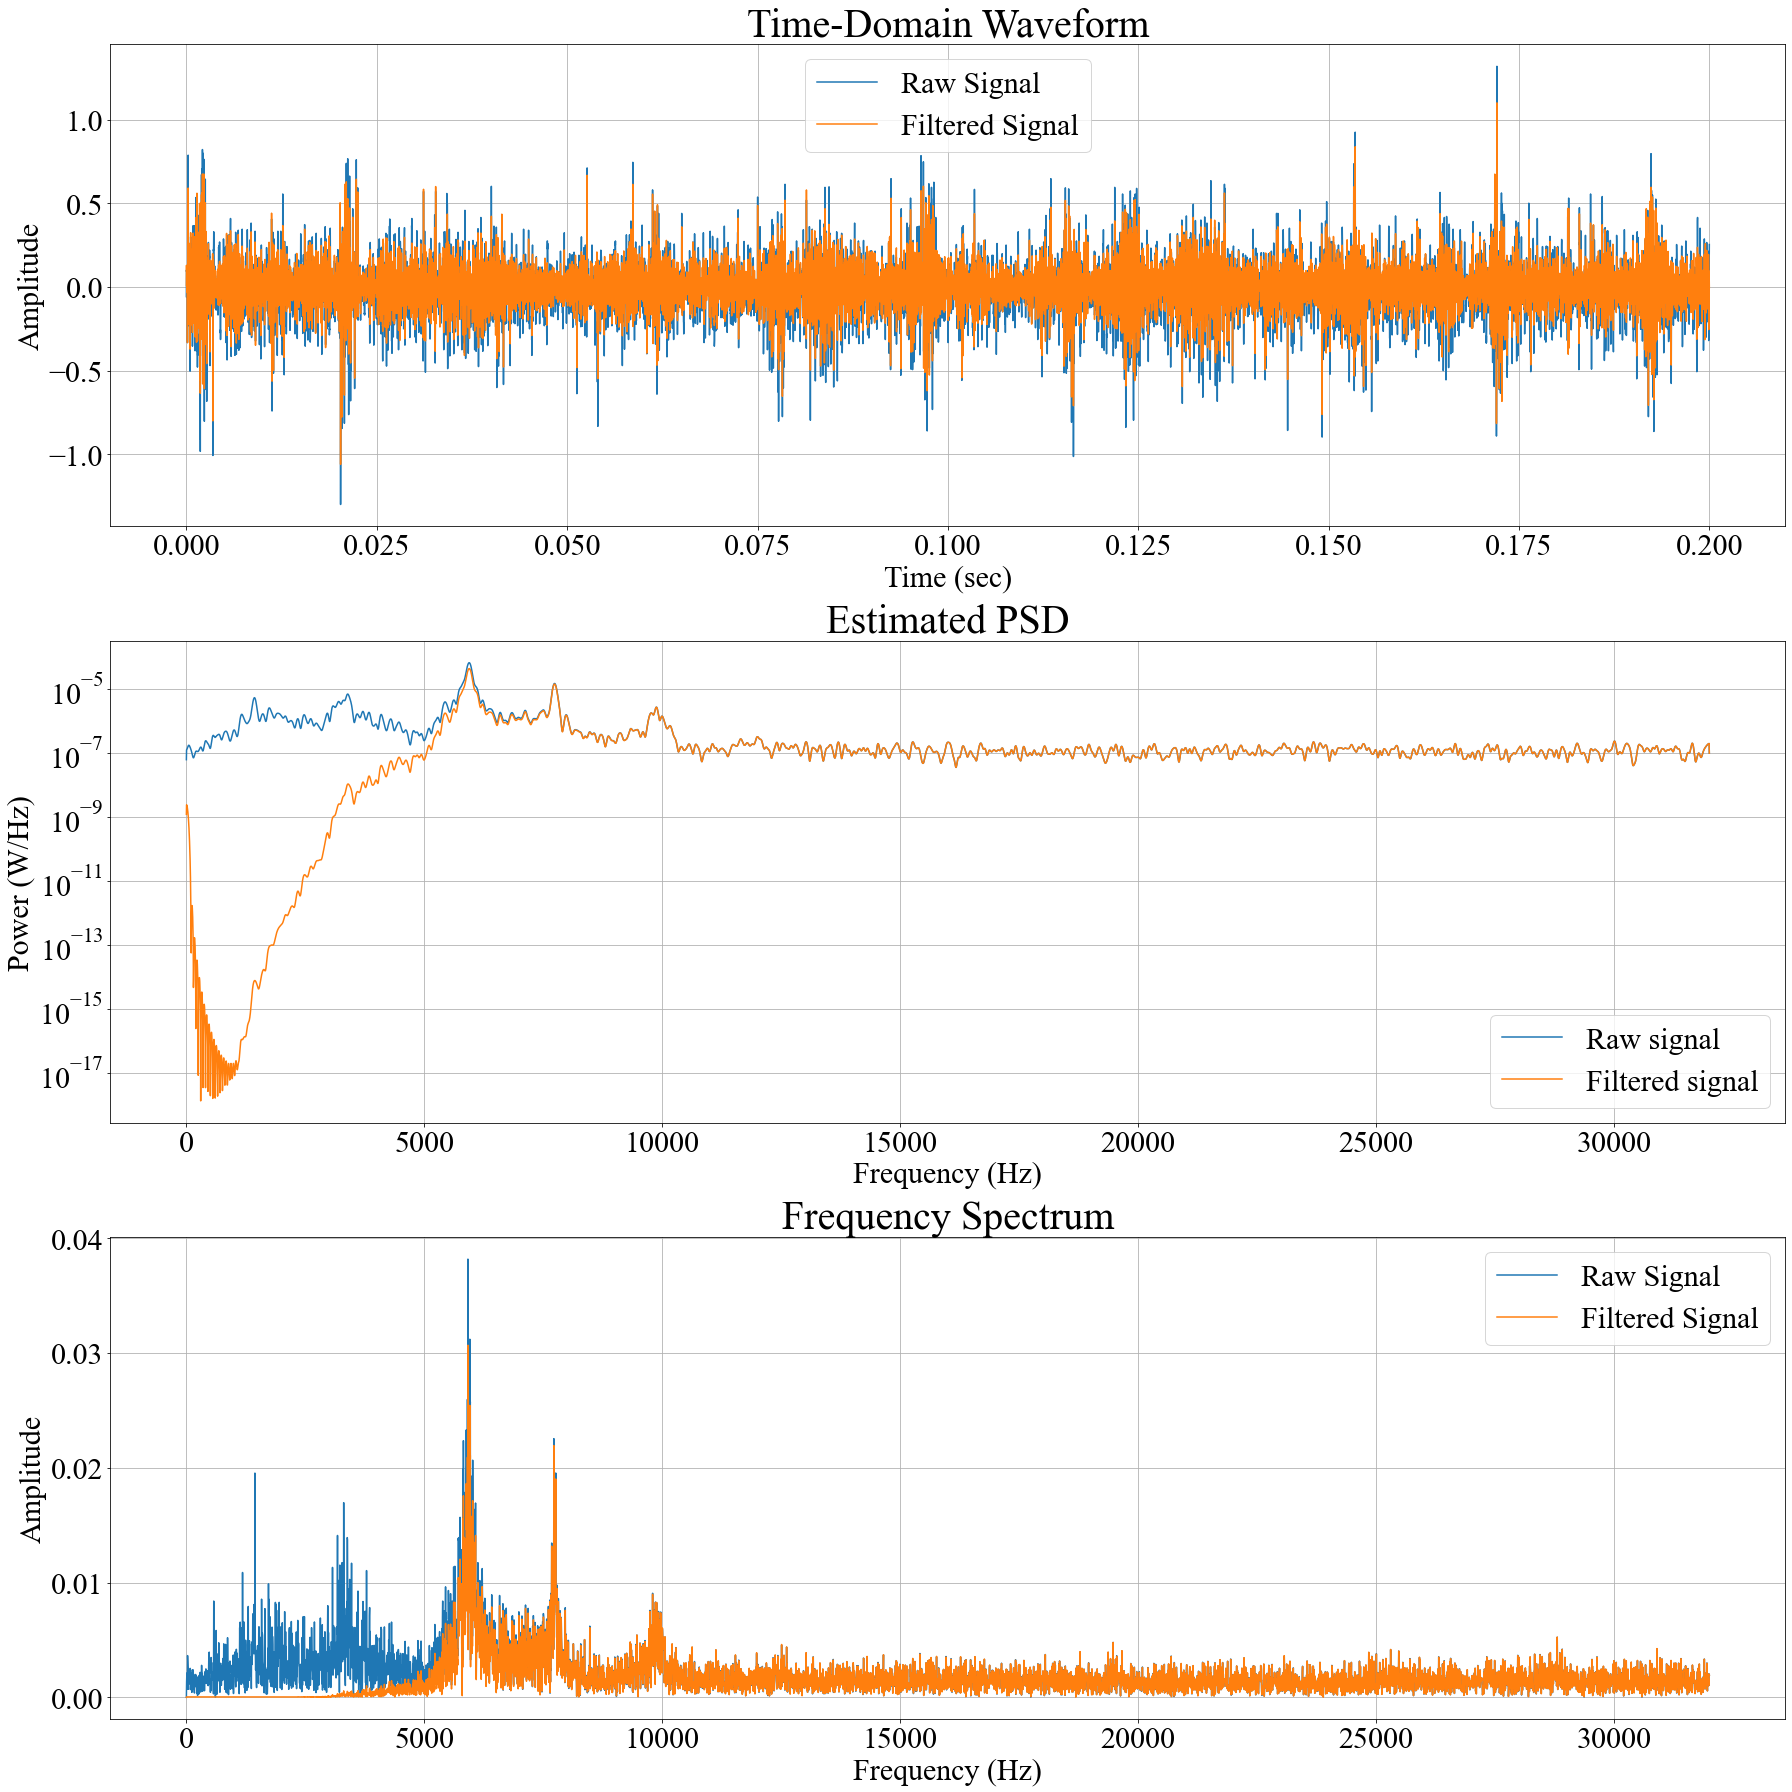

In [11]:
# A comparison between unfiltered (raw) and filtered EEG signals.

f_psd2, psd2 = compute_psd(filtered_signal,len(filtered_signal),  fs)
f_fft2, fft2 = apply_fft(filtered_signal, fs)

plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.plot(time, random_vib_signal, label='Raw Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (sec)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Time-Domain Waveform', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.semilogy(f_psd, psd, label = 'Raw signal')
plt.semilogy(f_psd2, psd2, label = 'Filtered signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Power (W/Hz)', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)
plt.title('Estimated PSD', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f_fft, fft_, label='Raw Signal')
plt.plot(f_fft2, fft2, label='Filtered Signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Frequency Spectrum', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.tight_layout()
plt.show()

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Design of  a band-pass filter with pass and cut-off frequencies of 5000 Hz and 10000 Hz:

In [12]:
N = 4  # Filter order. Generally, a higher order will have a steeper roll-off

filter_type = 'band'
b, a = butter(N, [5000, 10000],fs =fs,  btype= filter_type , analog=False) # a & b are filter coefficients

In [13]:
# Filtering:

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, random_vib_signal)

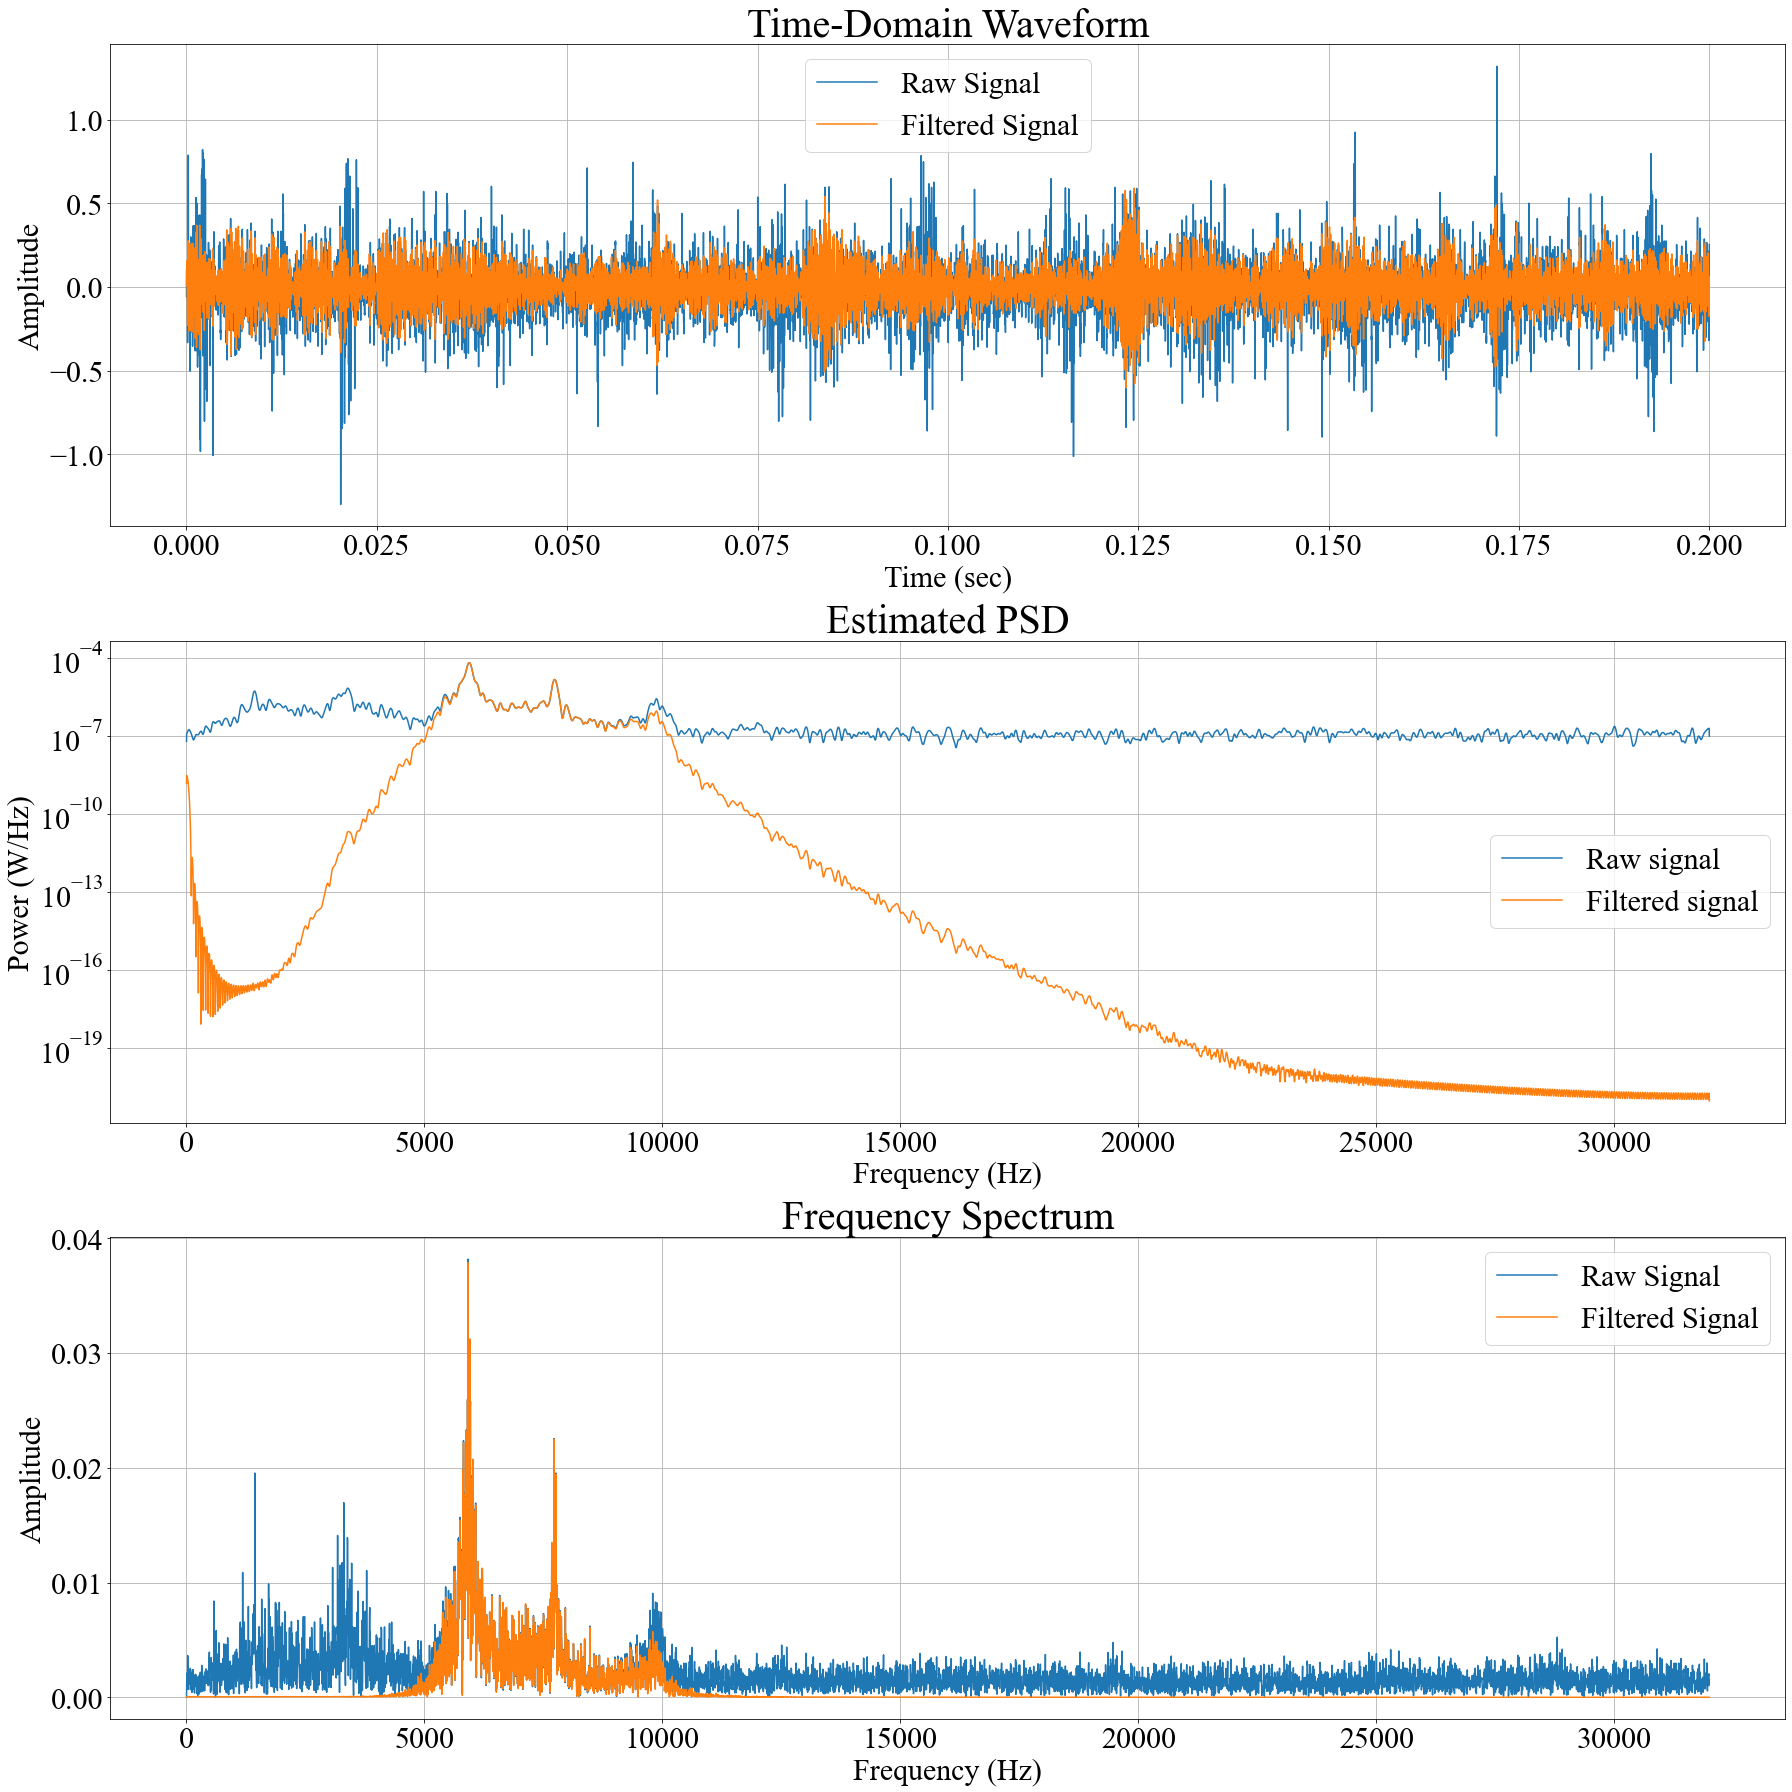

In [14]:
# A comparison between unfiltered (raw) and filtered EEG signals.

f_psd2, psd2 = compute_psd(filtered_signal,len(filtered_signal),  fs)
f_fft2, fft2 = apply_fft(filtered_signal, fs)

plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.plot(time, random_vib_signal, label='Raw Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (sec)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Time-Domain Waveform', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.semilogy(f_psd, psd, label = 'Raw signal')
plt.semilogy(f_psd2, psd2, label = 'Filtered signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Power (W/Hz)', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)
plt.title('Estimated PSD', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f_fft, fft_, label='Raw Signal')
plt.plot(f_fft2, fft2, label='Filtered Signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Frequency Spectrum', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.tight_layout()
plt.show()

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Design of  a band-stop filter with reject frequencies of 5000 Hz and 10000 Hz:

In [15]:
N = 4  # Filter order. Generally, a higher order will have a steeper roll-off

filter_type = 'bandstop'
b, a = butter(N, [5000, 10000],fs =fs,  btype= filter_type, analog=False) # a & b are filter coefficients

In [16]:
# Filtering:

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, random_vib_signal)

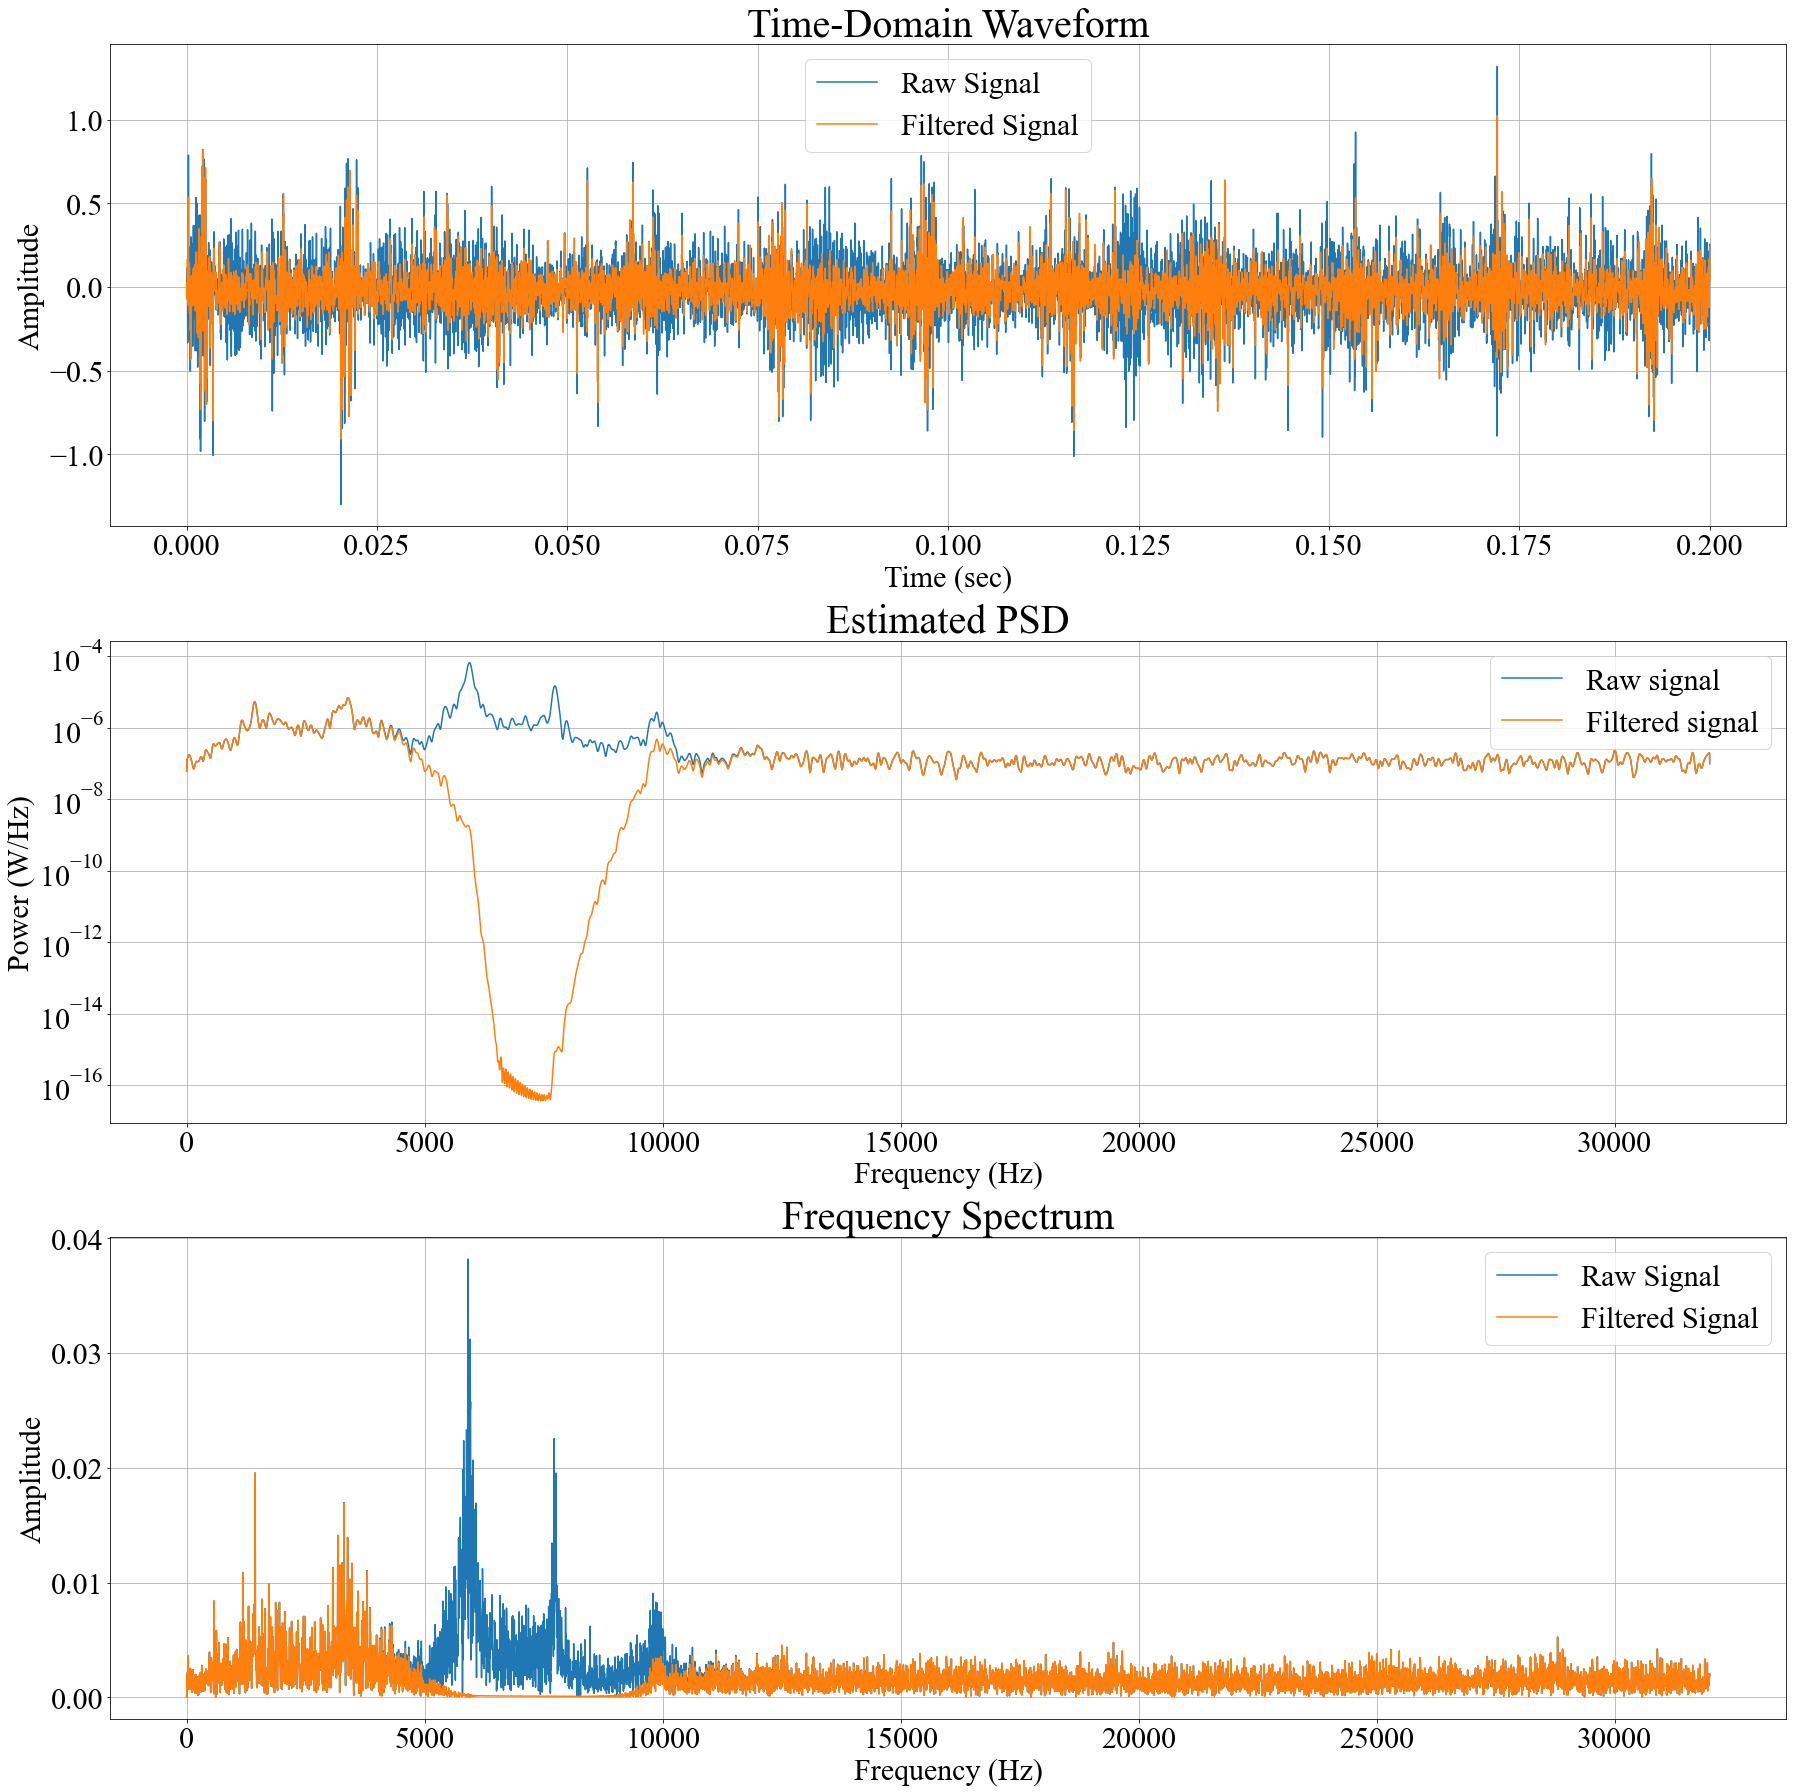

In [17]:
# A comparison between unfiltered (raw) and filtered EEG signals.

f_psd2, psd2 = compute_psd(filtered_signal,len(filtered_signal),  fs)
f_fft2, fft2 = apply_fft(filtered_signal, fs)

plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.plot(time, random_vib_signal, label='Raw Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (sec)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Time-Domain Waveform', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.semilogy(f_psd, psd, label = 'Raw signal')
plt.semilogy(f_psd2, psd2, label = 'Filtered signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Power (W/Hz)', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)
plt.title('Estimated PSD', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f_fft, fft_, label='Raw Signal')
plt.plot(f_fft2, fft2, label='Filtered Signal')
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Amplitude', fontsize = 30)
plt.tick_params('x', labelsize=30)
plt.tick_params('y', labelsize=30)
plt.title('Frequency Spectrum', fontsize = 40)
plt.legend(fontsize=30)
plt.grid(True)

plt.tight_layout()
plt.show()